# 8 이미지를 위한 인공 신경망
## 8-3 합성곱 신경망 시각화

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-12 11:34:01.503479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-12 11:34:01.503623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.026952017 0.2579011


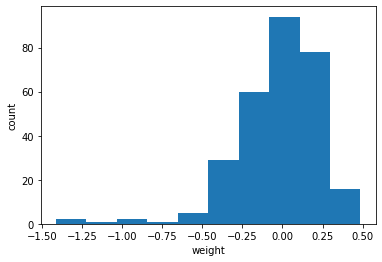

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

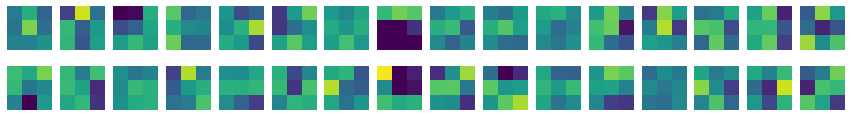

In [8]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()


In [10]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                                          padding='same',
                                          input_shape=(28,28,1)))

In [11]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weight = no_training_conv.weights[0].numpy()
print(no_training_weight.mean(),no_training_weight.std())

8.610388e-05 0.0804206


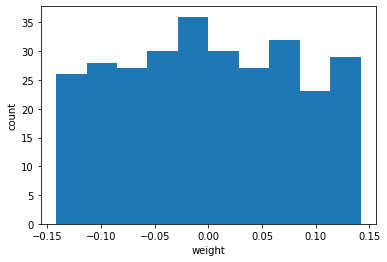

In [14]:
plt.hist(no_training_weight.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

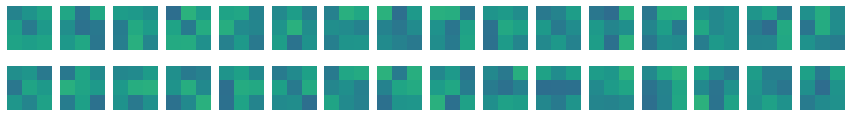

In [15]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weight[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()


In [20]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [21]:
conv_acti = keras.Model(model.input,model.layers[0].output)

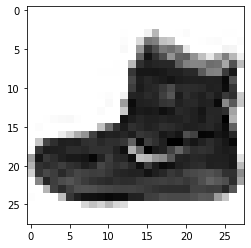

In [22]:
(train_input,train_target),(test_input,test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [23]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

2022-07-12 12:19:29.080188: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-12 12:19:29.114486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 212ms/step


In [24]:
print(feature_maps.shape)

(1, 28, 28, 32)


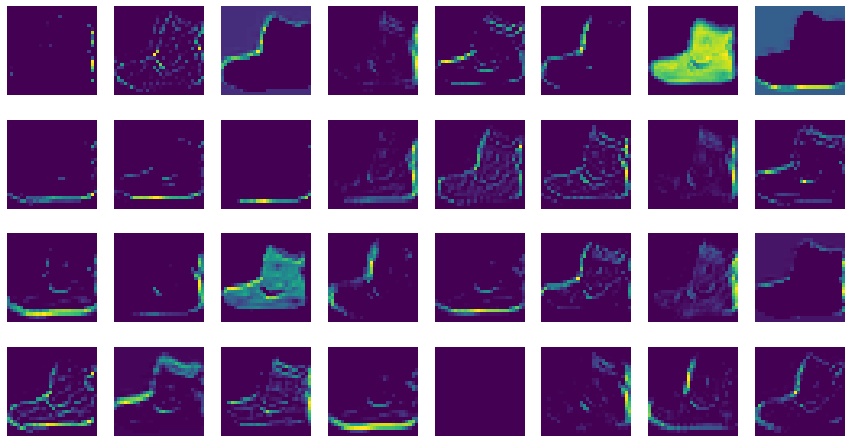

In [25]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [26]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [27]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 179ms/step


2022-07-12 12:22:56.860100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [29]:
print(feature_maps.shape)

(1, 14, 14, 64)


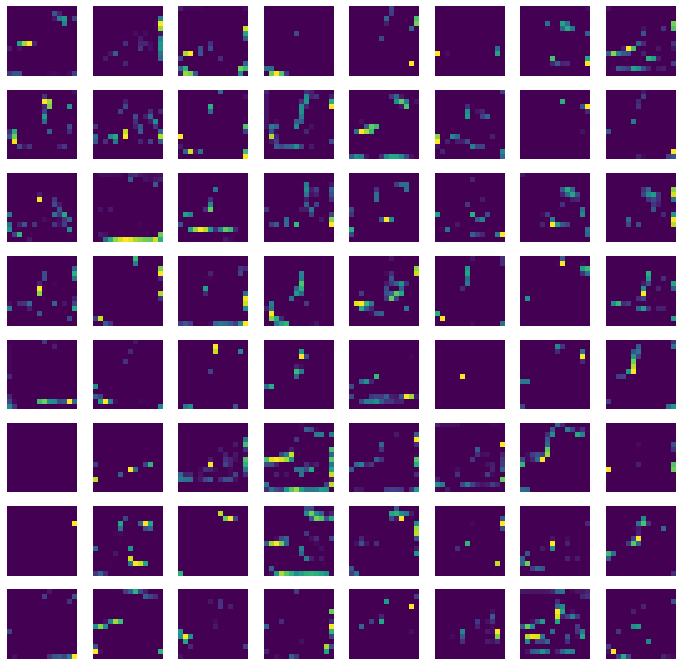

In [31]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [32]:
!code 21_rnn.ipynb